### Prerequisites

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import itertools
import pandas as pdd
import seaborn as sns
from markovModel import*
import networkx as nx
from scipy import stats
import pandas as pd

### Mira et al. data

In [2]:
#==============================================================================#
# The landscapes reported by Mira et. al.
#==============================================================================#
MIRA_AMP = FitnessLandscape([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821], "Ampicillin")
MIRA_AM  = FitnessLandscape([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047], "Amoxicillin")
MIRA_CEC = FitnessLandscape([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516], "Cefaclor")
MIRA_CTX = FitnessLandscape([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412], "Cefotaxime")
MIRA_ZOX = FitnessLandscape([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591], "Ceftizoxime")
MIRA_CXM = FitnessLandscape([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923], "Cefuroxime")
MIRA_CRO = FitnessLandscape([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227], "Ceftriaxone")
MIRA_AMC = FitnessLandscape([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728], "Amoxicillin + Clav")
MIRA_CAZ = FitnessLandscape([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563], "Ceftazidime")
MIRA_CTT = FitnessLandscape([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543], "Cefotetan")
MIRA_SAM = FitnessLandscape([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453], "Ampicillin +Sulbactam")
MIRA_CPR = FitnessLandscape([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288], "Cefprozil")
MIRA_CPD = FitnessLandscape([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268], "Cefpodoxime")
MIRA_TZP = FitnessLandscape([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171], "Piperacillin + Tazobactam")
MIRA_FEP = FitnessLandscape([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203], "Cefepime")



landscapes = [MIRA_AMP, MIRA_AM, MIRA_CEC, MIRA_CTX, MIRA_ZOX, MIRA_CXM, MIRA_CRO, MIRA_AMC, MIRA_CAZ, MIRA_CTT, MIRA_SAM, MIRA_CPR, MIRA_CPD, MIRA_TZP, MIRA_FEP]
names = ['AMP','AM','CEC','CTX','ZOX','CXM','CRO','AMC','CAZ', 'CTT','SAM','CPR','CPD','TZP','FEP']

In [6]:
abxDicts = [{'Name':'Ampicillin','Class':'Penicillin','Abbreviation':'AMP'},
            {'Name':'Amoxicillin','Class':'Penicillin','Abbreviation':'AM'},
           {'Name':'Cefaclor','Class':'Cephalosporin','Abbreviation':'CEC'},
            {'Name':'Cefotaxime','Class':'Cephalosporin','Abbreviation':'CTX'},
            {'Name':'Ceftizoxime','Class':'Cephalosporin','Abbreviation':'ZOX'},
           {'Name':'Cefuroxime','Class':'Cephalosporin','Abbreviation':'CXM'},
            {'Name':'Ceftriaxone','Class':'Cephalosporin','Abbreviation':'CRO'},
           {'Name':'Amoxicillin + Clav.','Class':'Penicillin + Inhib.','Abbreviation':'AMC'},
           {'dfName':'Ceftazidime','Class':'Cephalosporin','Abbreviation':'CAZ'},
           {'Name':'Cefotetan','Class':'Cephalosporin','Abbreviation':'CTT'},
           {'Name':'Ampicillin +Sulbactam','Class':'Penicillin + Inhib.','Abbreviation':'SAM'},
           {'Name':'Cefprozil','Class':'Cephalosporin','Abbreviation':'CPR'},
           {'Name':'Cefpodoxime','Class':'Cephalosporin','Abbreviation':'CPD'},
           {'Name':'Piperacillin + Tazobactam','Class':'Penicillin + Inhib.','Abbreviation':'TZP'},
           {'Name':'Cefepime','Class':'Cephalosporin','Abbreviation':'FEP'}]
classColors = {'Cephalosporin':'Navy', 'Penicillin + Inhib.':'Orangered','Penicillin':'Purple'}

In [7]:
df = pd.DataFrame(abxDicts)
df=df.rename(columns={"Name": "Antibiotic"})
df = df[df.columns[:3]]
df.iloc[8,0] = 'Ceftazidime'

In [8]:
tableColors = []
for abxDict in abxDicts:
    col = classColors[abxDict['Class']]
    #tableColors.append([col]*3)
    #col =(np.array(mpl.colors.to_rgb(col)))
    #col[3] = .5
    
    tableColors.append('color: '+str(col))
    #tableColors.append(col)
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''

    return tableColors
df_styled = df.style.apply(highlight_max).hide_index().set_table_styles([{'selector' : '', 
                            'props' : [('border', 
                                        '2px solid black')]}])

import dataframe_image as dfi
dfi.export(df_styled, 'table1.png')

### Calculating edge flips

In [13]:
l1 = FitnessLandscape([.5,.4,.7,.6])
l2 = FitnessLandscape([.5,.4,.7,.8])
p1 = buildTransitionMatrix(l1)
p2 = buildTransitionMatrix(l2)
edgeFlips(p1,p2)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -2.],
       [ 0.,  0.,  0.,  0.]])

Text(-0.2, 0.55, 'Fitness')

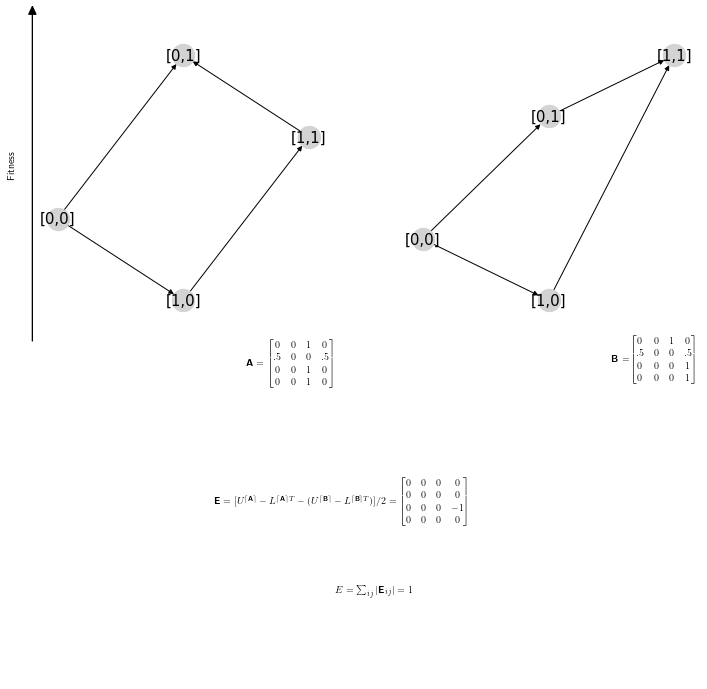

In [14]:
fig,axs=plt.subplots(2,2,figsize=(12,12))


g1 = nx.DiGraph()
g1.add_nodes_from([1,2,3,4])
g1.add_edge(1,2)
g1.add_edge(1,3)
g1.add_edge(3,4)
g1.add_edge(4,2)

pos1= {(1):np.array([0,.5]),(2):np.array([.5,.7]),(3):np.array([.5,.4]),(4):np.array([1,.6])}
labe= {(1):'[0,0]',(2):'[0,1]',(3):'[1,0]',(4):'[1,1]'}
nx.draw(g1,with_labels=True,pos=pos1,ax=axs[0,0],labels=labe,
        node_color = 'lightgray',node_size=500,font_size = 15)

g2 = nx.DiGraph()
g2.add_nodes_from([1,2,3,4])
g2.add_edge(1,2)
g2.add_edge(1,3)
g2.add_edge(2,4)
g2.add_edge(3,4)
pos2= {(1):np.array([.1,.5]),(2):np.array([.6,.7]),(3):np.array([.6,.4]),(4):np.array([1.1,.8])}
G2 = nx.hypercube_graph(2)
nx.draw(g2,labels=labe,pos=pos2,ax=axs[0,1],node_color = 'lightgray',node_size=500,font_size = 15)


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'



axs[0,0].text(0.75, .32, r'$\textbf{A} = \begin{bmatrix} 0 & 0 & 1 & 0 \\ .5 & 0 & 0  & .5 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0  \end{bmatrix}$')
axs[0,1].text(0.85, .3, r'\textbf{B} =$\begin{bmatrix} 0 & 0 & 1 & 0 \\ .5 & 0 & 0  & .5 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 1  \end{bmatrix}$')

axs[1,0].axis(False)

axs[1,1].axis(False)
axs[1,0].text(0.6, .6, r'$\textbf{E} =  [U^{\lceil\textbf{A}\rceil} - L^{\lceil\textbf{A}\rceil T} - ( U^{\lceil\textbf{B}\rceil} - L^{\lceil\textbf{B}\rceil T})]/2 = \begin{bmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0  & 0 \\ 0 & 0 & 0 & -1 \\ 0 & 0 & 0 & 0  \end{bmatrix}$')
axs[1,0].text(1, .3,r'$E =  \sum_{ij}|\textbf{E}_{ij}| = 1$')

axs[0,0].arrow(-.1,.35,0,.4,clip_on=False,head_width=.03,head_length= .01,color='k'
              )
axs[0,0].text(-.2,.55,'Fitness',rotation=90)

#plt.savefig('toylandscape.pdf')

Text(0.45, 0.45, '$D =  \\sum_{ij}|\\textbf{D}_{ij}|$')

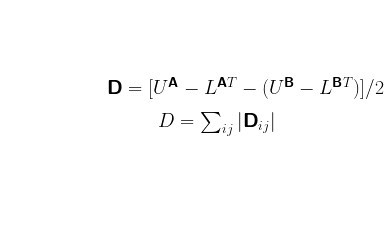

In [15]:
fig,ax=plt.subplots()
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
ax.axis(False)
ax.text(0.3, .6, r'$\textbf{D} =  [U^{\textbf{A}} - L^{\textbf{A} T} - ( U^{\textbf{B}} - L^{\textbf{B} T})]/2 $'
        ,fontsize=20)
ax.text(.45, .45,r'$D =  \sum_{ij}|\textbf{D}_{ij}|$',fontsize=20)

#plt.savefig('eqSI.pdf')

In [19]:
peakDist = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        k1=l1.getGlobalPeak()
        k2=l2.getGlobalPeak()
        hammingDistance(k1,k2)
        

        peakDist[i,j] = hammingDistance(k1,k2)

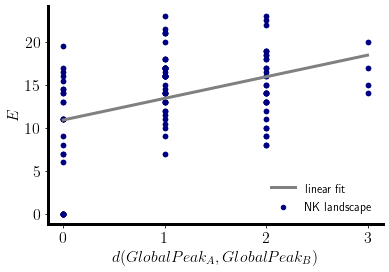

In [20]:
fig,ax=plt.subplots()
ax.scatter(peakDist.flatten(),flipMatrix.flatten(),s=20,
           color='navy',label = 'NK landscape ')

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
    
ax.set_xlabel('$d(Global Peak_A, Global Peak_B)$',fontsize=16)

x,y= peakDist.flatten(),flipMatrix.flatten()
m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,3,100),m*np.linspace(0,3,100)+b,lw= 3,linestyle="-",color='grey', label='linear fit')
ax.set_ylabel('$E$',fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=12,edgecolor='w')

In [21]:
flipMatrix = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrix[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))

In [22]:
diffMatrix = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        diffMatrix[i,j] = np.sum(np.abs(transMatDiff(p1,p2)/2))

In [23]:
p1 = buildTransitionMatrix(MIRA_AM)
p2 = buildTransitionMatrix(MIRA_CTX)
np.sum(np.abs(edgeFlips(p1,p2)/2))

23.0

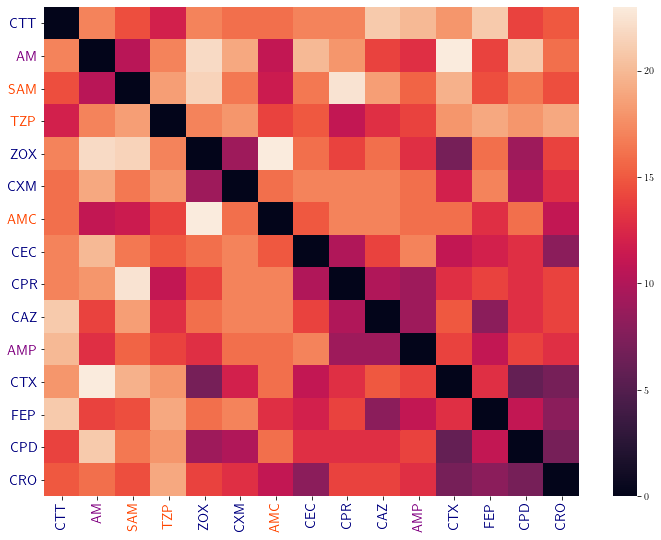

In [24]:
fig,ax=plt.subplots(figsize=(12,9))
df = pd.DataFrame(data=flipMatrix,columns = names,index=names)
rank =np.argsort(np.sum(flipMatrix,axis=1));
g = sns.heatmap(flipMatrix[rank[::-1]][:,rank[::-1]],ax=ax);
ax.set_xticklabels(np.array(names)[rank[::-1]]);
ax.set_yticklabels(np.array(names)[rank[::-1]]);


for l in g.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(90)


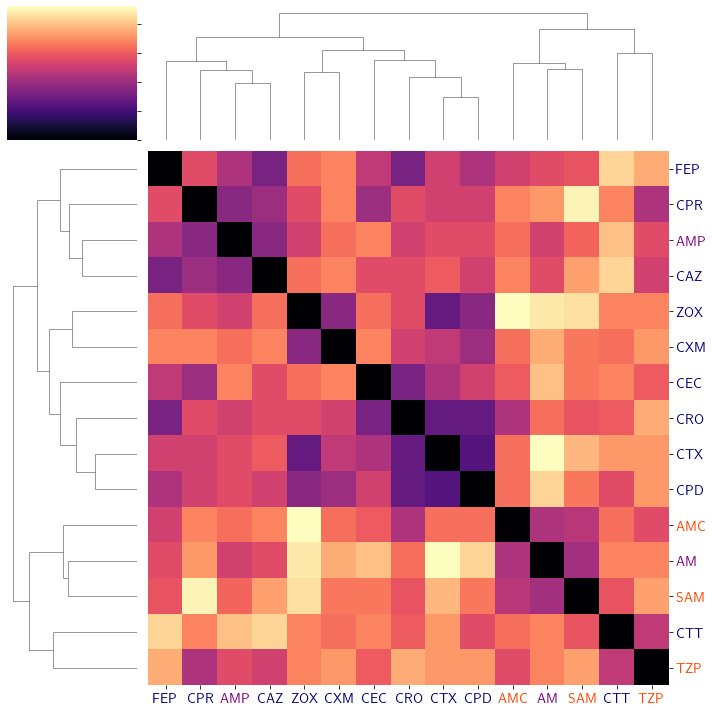

In [26]:

df = pd.DataFrame(data=flipMatrix,columns = names,index=names)
g = sns.clustermap(df,cmap = 'magma')

for l in g.ax_heatmap.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.ax_heatmap.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)


g.ax_heatmap.collections[0].colorbar.set_label("",fontsize=16)
#g.ax_heatmap.collections[0].colorbar.ax.tick_params(labelsize=14)
g.ax_heatmap.collections[0].colorbar.ax.set_yticklabels([],labelsize=14)
plt.tight_layout()
#plt.savefig('edgeflipcluster.pdf')
#plt.tight_layout()

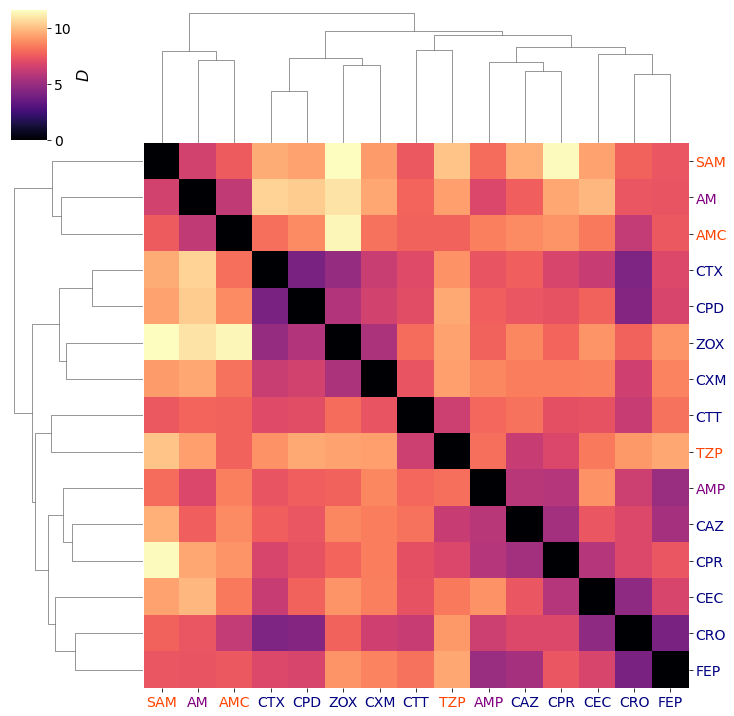

In [80]:

df = pd.DataFrame(data=diffMatrix,columns = names,index=names)
g = sns.clustermap(df,cmap = 'magma')

for l in g.ax_heatmap.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.ax_heatmap.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)

g.ax_heatmap.collections[0].colorbar.set_label(r"$D$",fontsize=16)
#g.ax_heatmap.collections[1].colorbar.set_label(r"$\sum \Delta E'$",fontsize=16)
g.ax_heatmap.collections[0].colorbar.ax.tick_params(labelsize=14)

#ax.yaxis.set_tick_params(labelsize=16)

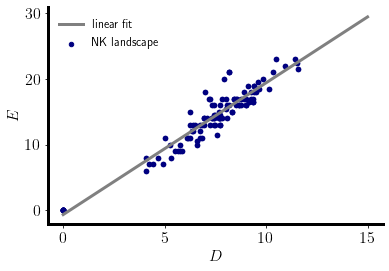

In [27]:
fig,ax=plt.subplots()
ax.scatter(diffMatrix.flatten(),flipMatrix.flatten(),s=20,
           color='navy',label = 'NK landscape ')

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
    
ax.set_xlabel('$D$',fontsize=16)

x,y= diffMatrix.flatten(),flipMatrix.flatten()
m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,15,100),m*np.linspace(0,15,100)+b,lw= 3,linestyle="-",color='grey', label='linear fit')
ax.set_ylabel('$E$',fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=12,edgecolor='w')
#plt.savefig('edgeflipmatdiff.pdf')

In [28]:
flipList = flipMatrix.flatten()
flipList = flipList[flipList!=0]

In [29]:
print('Maximum edge flips: ' + str(np.max(flipMatrix)))
print('Minimum edge flips: ' + str(np.min(flipList)))

Maximum edge flips: 23.0
Minimum edge flips: 6.0


In [30]:
np.array(names)[np.argwhere(flipMatrix ==np.max(flipList) )[0]]

array(['AM', 'CTX'], dtype='<U3')

In [31]:
np.array(names)[np.argwhere(flipMatrix ==np.min(flipList) )[0]]


array(['CTX', 'CPD'], dtype='<U3')

(0.0, 1.0, 0.0, 1.0)

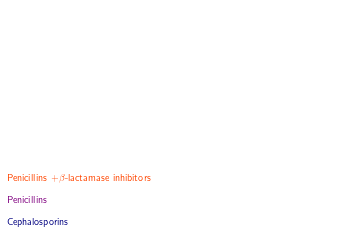

In [32]:
fig,ax=plt.subplots()

ax.text(0,0,"Cephalosporins",c='Navy')

ax.text(0,.1,"Penicillins",c='Purple')
ax.text(0,.2,r"Penicillins +$\beta$-lactamase inhibitors",c='Orangered')
ax.axis(False)

#plt.savefig('abxlegend.pdf')

## Nichol et al. results

In [33]:
L_AMP = limitMatrix(buildTransitionMatrix(MIRA_AMP))
L_AM  = limitMatrix(buildTransitionMatrix(MIRA_AM))
L_CEC = limitMatrix(buildTransitionMatrix(MIRA_CEC))
L_CTX = limitMatrix(buildTransitionMatrix(MIRA_CTX))
L_ZOX = limitMatrix(buildTransitionMatrix(MIRA_ZOX))
L_CXM = limitMatrix(buildTransitionMatrix(MIRA_CXM))
L_CRO = limitMatrix(buildTransitionMatrix(MIRA_CRO))
L_AMC = limitMatrix(buildTransitionMatrix(MIRA_AMC))
L_CAZ = limitMatrix(buildTransitionMatrix(MIRA_CAZ))
L_CTT = limitMatrix(buildTransitionMatrix(MIRA_CTT))
L_SAM = limitMatrix(buildTransitionMatrix(MIRA_SAM))
L_CPR = limitMatrix(buildTransitionMatrix(MIRA_CPR))
L_CPD = limitMatrix(buildTransitionMatrix(MIRA_CPD))
L_TZP = limitMatrix(buildTransitionMatrix(MIRA_TZP))
L_FEP = limitMatrix(buildTransitionMatrix(MIRA_FEP))

limit_matrices = [L_AMP, L_AM, L_CEC, L_CTX, L_ZOX, L_CXM, L_CRO, L_AMC, L_CAZ, L_CTT, L_SAM, L_CPR, L_CPD, L_TZP, L_FEP]

#==============================================================================#
# The initial population vector. Each genotype is considered equally likely to 
# constitute the initial genotype.
#==============================================================================#
init_pop = np.array([1./2**4 for i in range(16)])

#==============================================================================#
# Functions which generate the results of table 1 in the manuscript
#==============================================================================#

# Determines for each drug the probability of ending at the highest fitness peak
# genotype when starting from the initial distribution init_pop.
def probHighestPeak(init_pop):
	highest_pgs_probs = []
	for t in range(len(limit_matrices)):
		dist = np.array(init_pop * limit_matrices[t])[0]
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		highest_pgs_probs.append(dist[global_peak_index])
		print(landscapes[t].name+":", highest_pgs_probs[t])

	return highest_pgs_probs

# Determines for each drug the single steering drug which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestSingle(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_steerer = -1
		for s in range(len(limit_matrices)):
			dist = np.array(init_pop * limit_matrices[s] * limit_matrices[t])[0]
			if dist[global_peak_index] < best_prob:
				best_prob = dist[global_peak_index]
				best_steerer = s
		best_steerers.append((landscapes[s], best_prob))

		print(landscapes[t].name+":", landscapes[best_steerer].name, best_prob)
	return best_steerers

# Determines for each drug the ordered pair of steering drugs which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestDouble(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_s1 = -1
		best_s2 = -1
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[t])[0]
				if dist[global_peak_index] < best_prob:
					best_prob = dist[global_peak_index]
					best_s1 = s1
					best_s2 = s2

		print(landscapes[t].name+":", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+", ", best_prob)
		best_steerers.append((landscapes[best_s2], landscapes[best_s2], best_prob))
	return best_steerers

# Determines for each drug the ordered triple of steering drugs which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestTriple(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_s1 = -1
		best_s2 = -1
		best_s3 = -1
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				for s3 in range(len(limit_matrices)):
					dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[s3] * limit_matrices[t])[0]
					if dist[global_peak_index] < best_prob:
						best_prob = dist[global_peak_index]
						best_s1 = s1
						best_s2 = s2
						best_s3 = s3


		print(landscapes[t].name+":", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+" ---> "+landscapes[best_s3].name+", ", best_prob)
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], landscapes[best_s3], best_prob))

	return best_steerers

#==============================================================================#
# Functions which generate the results of table 2 in the manuscript
#==============================================================================#

# Determines for each drug the probability of ending at the lowest fitness peak
# genotype when starting from the initial distribution init_pop.
def probLowestPeak(init_pop):
	lowest_pgs_probs = []
	for t in range(len(limit_matrices)):
		dist = np.array(init_pop * limit_matrices[t])[0]
		lpg = landscapes[t].getLowestFitnessPeak()
		lowest_pgs_probs.append(dist[convertGenotypeToInt(lpg)])		
		print(landscapes[t].name+":", lowest_pgs_probs[t])

	return lowest_pgs_probs

# Determines for each drug the single steering drug which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestSingle(init_pop):
	best_steerers = [] 
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_steerer = -1
		best_prob = 0.0

		#For each possible steerer
		for s in range(len(limit_matrices)):
			dist = np.array(init_pop * limit_matrices[s] * limit_matrices[t])[0]
			if dist[lowest_peak_index] > best_prob:
				best_prob = dist[lowest_peak_index]
				best_steerer = s
		best_steerers.append((landscapes[best_steerer], best_prob))

		print(landscapes[t].name+":", best_steerers[t][0].name, best_steerers[t][1])

	return best_steerers

# Determines for each drug the ordered pair of steering drugs which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestDouble(init_pop):
	best_steerers = [] 
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_s1 = -1
		best_s2 = -1
		best_prob = 0.0
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[t])[0]
				if dist[lowest_peak_index] > best_prob:
					best_prob = dist[lowest_peak_index]
					best_s1 = s1
					best_s2 = s2
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], best_prob))
		print(landscapes[t].name+":  ", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+", ", best_prob)

	return best_steerers

# Determines for each drug the ordered triple of steering drugs which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestTriple(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_s1 = -1
		best_s2 = -1
		best_s3 = -1
		best_prob = 0.0
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				for s3 in range(len(limit_matrices)):
					dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[s3] * limit_matrices[t])[0]
					if dist[lowest_peak_index] > best_prob:
						best_prob = dist[lowest_peak_index]
						best_s1 = s1
						best_s2 = s2
						best_s3 = s3
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], landscapes[best_s3], best_prob))
		print(landscapes[t].name+":  ", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+" ---> "+landscapes[best_s3].name+", ", best_prob)

	return best_steerers

#==============================================================================#
# Functions which generate the results of table 3 in the manuscript
#==============================================================================#

# Determines the percentage of single steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def singleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for s in range(len(limit_matrices)): 
				steered_pop = (init_pop * limit_matrices[s] * limit_matrices[t]).tolist()[0]
				straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

				#Floating point arithematic is nasty, check for what is essential equality
				if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
					same+=1
				elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
					worse+=1
				elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
					better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)



	print("Overall, better:", str(overall_better)+" ("+str(pc_ov_better)+"%)", ", worse:", str(overall_worse)+" ("+str(pc_ov_worse)+"%)")
	return steering_stats


# Determines the percentage of ordered pairs of steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def doubleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for k1 in range(len(limit_matrices)):
				for k2 in range(len(limit_matrices)): 
					steered_pop = (init_pop * limit_matrices[k1] * limit_matrices[k2] * limit_matrices[t]).tolist()[0]
					straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

				
					#Floating point arithematic is nasty, check for what is essential equality
					if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
						same+=1
					elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
						worse+=1
					elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
						better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)



	print("Overall, better:", str(overall_better)+" ("+str(pc_ov_better)+"%)", ", worse:", str(overall_worse)+" ("+str(pc_ov_worse)+"%)")
	return steering_stats


# Determines the percentage of ordered triples of steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def tripleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for k1 in range(len(limit_matrices)):
				for k2 in range(len(limit_matrices)): 
					for k3 in range(len(limit_matrices)):

						steered_pop = (init_pop * limit_matrices[k1] * limit_matrices[k2] * limit_matrices[k3] * limit_matrices[t]).tolist()[0]
						straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

						#Floating point arithematic is nasty, check for what is essential equality
						if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
							same+=1
						elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
							worse+=1
						elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
							better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)

# g=0000 is the initial genotype 
init_wt = np.array([1.]+[0. for i in range(15)])
#==============================================================================#
# Simulates a single instance of determining collateral sensitivity
#
# As evolution is not necessarily repeatable, this is not guaranteed to generate
# the same matrix of collateral sensitivity on each instance.
#==============================================================================#
def col_sensitivity(d1, d2, init_pop, relative=True):
    limit_d1 = limit_matrices[d1]
    pop_dist = init_pop * limit_d1
    pop_dist = np.array(pop_dist)[0]
    peak = np.random.choice(np.array([i for i in range(16)]), p=pop_dist)
    
    f_evolved = landscapes[d2].getFitness(convertIntToGenotype(peak,4))
    f_wt = landscapes[d2].getFitness(convertIntToGenotype(0,4))
    
    col_sens = np.log2(f_evolved / f_wt)
    return col_sens

def generateCSN(init_pop):
    network = [[col_sensitivity(d1,d2,init_pop) for d1 in range(len(landscapes))] 
               for d2 in range(len(landscapes))]
    return network

#==============================================================================#
# Determines the most likely CSM and the associated probability
#==============================================================================#
def most_likely(init_pop):
    gs,ps = [],[]
    for d in range(15):
        limit = limit_matrices[d]
        pop_dist = np.array(init_pop * limit)[0]
        g = np.argmax(pop_dist)
        gs.append(g)
        ps.append(pop_dist[g])

    network = [[np.log2(landscapes[d2].getFitness(convertIntToGenotype(g,4)) \
                        /landscapes[d2].getFitness(convertIntToGenotype(0,4))) \
                for g in gs] \
                for d2 in range(15)]
    p = np.product(ps)
    return p,network

#==============================================================================#
# Determines the best and worst case outcome by means of multiple
# trials.
#==============================================================================#
def worst_mat(init_pop):
    def worst_outcome(d1,d2,init_pop):
        limit_d1 = limit_matrices[d1]
        pop_dist = init_pop * limit_d1
        pop_dist = np.array(pop_dist)[0]

        wt_f = landscapes[d2].getFitness([0,0,0,0])
        
        #Determine the highest fitness outcome.
        worst_f = -np.inf
        for i in range(len(pop_dist)):
            if pop_dist[i] > 10**(-8): #If its possible
                i_f = landscapes[d2].getFitness(convertIntToGenotype(i,4))
                if  i_f > worst_f:
                    worst_f = i_f 
        
        return np.log2(worst_f/wt_f)
    
    mat =[[worst_outcome(d1,d2,init_pop) \
               for d1 in range(len(landscapes))] \
            for d2 in range(len(landscapes))]
    return mat


def best_mat(init_pop):
    def best_outcome(d1,d2,init_pop):
        limit_d1 = limit_matrices[d1]
        pop_dist = init_pop * limit_d1
        pop_dist = np.array(pop_dist)[0]

        wt_f = landscapes[d2].getFitness([0,0,0,0])
        
        #Determine the highest fitness outcome.
        best_f = np.inf
        for i in range(len(pop_dist)):
            if pop_dist[i] > 10**(-8): #If its possible
                i_f = landscapes[d2].getFitness(convertIntToGenotype(i,4))
                if  i_f < best_f:
                    best_f = i_f 
        
        return np.log2(best_f/wt_f)
    
    mat =[[best_outcome(d1,d2,init_pop) \
               for d1 in range(len(landscapes))] \
            for d2 in range(len(landscapes))]
    return mat

#==============================================================================#
# Determines the average collateral response for each drug pair
#==============================================================================#
def expected_network(init_pop):
    
    def expected_sensitivity(d1,d2,init_pop):
        limit_d1 = limit_matrices[d1]
        pop_dist = init_pop * limit_d1
        pop_dist = np.array(pop_dist)[0]
        
        expected_evo_f = sum([pop_dist[i] * landscapes[d2].getFitness(convertIntToGenotype(i,4)) \
                                   for i in range(16)])
        wt_f = landscapes[d2].getFitness(convertIntToGenotype(0,4))
        
        expected_fitness = np.log2(expected_evo_f/wt_f)
        return expected_fitness
    
    network =[[expected_sensitivity(d1,d2,init_pop) \
               for d1 in range(len(landscapes))] \
            for d2 in range(len(landscapes))]
    return network

#==============================================================================#
# Computes the likelihood of CLR from a random drug pair
#
# Here we assume that the drug pair is chosen uniformly at random. As such, 
# the probability of choosing a CR pair at random can be determined analytically by 
# summing, over all possible pairs, the total probability mass of collateral
# resistance and then normalising appropriately.
#==============================================================================#
def random_cl():
    tot = 0.
    for d1 in range(15):
        for d2 in range(15):
            if d1!=d2:
                temp = 0
                wt_f = landscapes[d1].getFitness([0,0,0,0])
                ev_pop = init_wt * limit_matrices[d1]
                ev_pop = np.array(ev_pop)[0]
                for k in range(len(ev_pop)):
                    ev_f = landscapes[d2].getFitness(convertIntToGenotype(k,4))
                    if ev_f > wt_f:
                        temp+=ev_pop[k]
                tot+=temp
    tot = tot / (15. * 14.)
    return tot

#==============================================================================#
# Determines the probability that a pair identified as CS in a single simulation of 
# experimental evolution is CR in a second simulation.
#
# This is determined by repeatedly sampling a random matrix of collateral response,
# choosing a CS pair at random and then determining the likelihood that the first of 
# that pair induces CR in the second.
#==============================================================================#
def prob_clr():
    #generate a random csn
    csn = generateCSN(init_wt)
    #Pick a pair with CS are random
    flag = True
    while flag:
        d1 = np.random.randint(0,14)
        d2 = np.random.randint(0,14)
        if csn[d1][d2] < 0.0:
            flag = False

    #find the probability of clr.
    prob_res = 0.0
    wt_f = landscapes[d1].getFitness([0,0,0,0])
    ev_pop = init_wt * limit_matrices[d1]
    ev_pop = np.array(ev_pop)[0]
    for k in range(len(ev_pop)):
        ev_f = landscapes[d2].getFitness(convertIntToGenotype(k,4))
        if ev_f > wt_f:
            prob_res += ev_pop[k]

    return prob_res

#10000 samples:
S = 10**3 #10**6 #In the paper
cr_ps =  np.mean([prob_clr() for _ in range(S)])

#==============================================================================#
# Given two drugs, returns the probability that evolution
# under the first results in a genotype with fitness under the
# second that is lower than the WT fitness.
#==============================================================================#
def prob_better(d1,d2,init_pop):
    limit_d1 = limit_matrices[d1]
    pop_dist = init_pop * limit_d1
    pop_dist = np.array(pop_dist)[0]

    prob = 0
    wt_f = landscapes[d2].getFitness([0,0,0,0])
    for i in range(len(pop_dist)):
        if landscapes[d2].getFitness(convertIntToGenotype(i,4)) < wt_f:
            prob+=pop_dist[i]

    return prob
#==============================================================================#
# Collateral Sensitivity Likelihood matrix
#==============================================================================#
def prob_matrix(init_pop):
    mat = [[prob_better(d1,d2,init_pop) for d1 in range(len(landscapes))] \
           for d2 in range(len(landscapes))]
    return mat

#==============================================================================#
# Plots the table of collateral sensitivity likelihood
#==============================================================================#
def show_CSL(mat):
    fig = plt.figure(figsize  = (6,5))
    ax = fig.add_subplot(111)
    cax=ax.matshow(mat, cmap = plt.cm.Greens, vmin = 0.0, vmax = 1.0)

    cbar = fig.colorbar(cax)
    cbar.set_label('Probability of collateral sensitivity', size=14)

    ax.set_xticks(range(len(labs)))
    ax.set_yticks(range(len(labs)))
    ax.set_xticklabels(labs, rotation=45, size=12)
    ax.set_yticklabels(labs, size=12)
    ax.axis('image')

    ax.set_xlabel('First drug', size='16')
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel('Second drug', size='16')

#==============================================================================#
# Returns a CSL in which all entries <p are set to zero
#==============================================================================#
def cut_off_probs_CSL(network, p):
    new_net = [[x if p-x<=10**(-8) else 0.0 for x in y] for y in network]
    return new_net

## Single Steering Drugs and Edge Flips

In [34]:
csl = prob_matrix(init_wt,)

In [35]:
df_csl = pd.DataFrame(csl,columns = names,index=names)

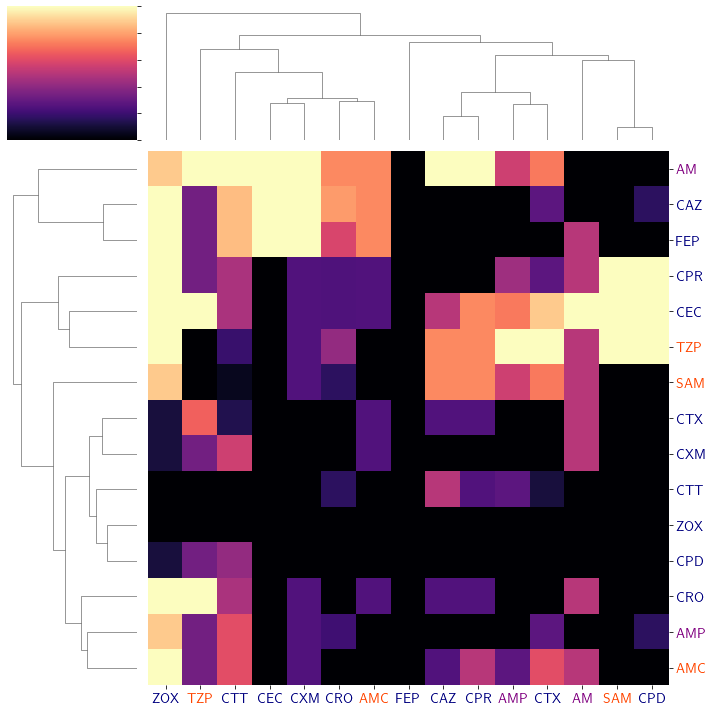

In [36]:
g = sns.clustermap(df_csl,cmap='magma')

for l in g.ax_heatmap.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.ax_heatmap.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)

g.ax_heatmap.collections[0].colorbar.set_label('',fontsize=16)
#g.ax_heatmap.collections[0].colorbar.ax.tick_params([],labelsize=14)
g.ax_heatmap.collections[0].colorbar.ax.set_yticklabels([])

plt.tight_layout()
#plt.savefig('CSLcluster.pdf')

In [37]:
maxCSL=np.zeros((len(csl),len(csl)))
for i in range(len(csl)):
    for j in range(len(csl)):
        maxCSL[i,j] = max(np.triu(csl)[i,j],np.tril(csl).T[i,j])

maxCSL = maxCSL+maxCSL.T    



minCSL=np.zeros((len(csl),len(csl)))
for i in range(len(csl)):
    for j in range(len(csl)):
        minCSL[i,j] = min(np.triu(csl)[i,j],np.tril(csl).T[i,j])

minCSL = minCSL+minCSL.T    

In [38]:
len(y)

225

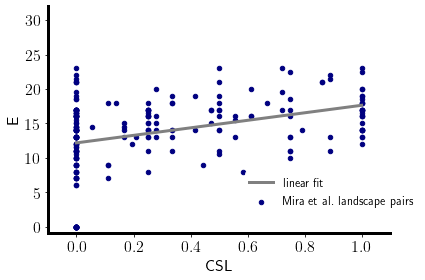

In [40]:
fig,ax= plt.subplots()
x=np.array(csl).flatten()
y= np.array(flipMatrix).flatten()

ax.scatter(np.array(csl).flatten(),np.array(flipMatrix).flatten(),
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.set_ylabel('E',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlim([-.1,1.1])
ax.set_ylim([-1,32])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

    
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')
plt.tight_layout()
#plt.savefig('miraflipsCSL.pdf')

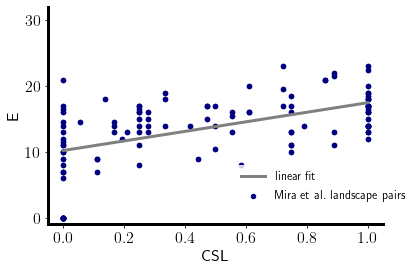

In [41]:
fig,ax= plt.subplots()
x=np.array(maxCSL).flatten()
y= np.array(flipMatrix).flatten()

ax.scatter(np.array(maxCSL).flatten(),np.array(flipMatrix).flatten(),
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel('E',fontsize=16)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

ax.set_xlim([-.05,1.05])
ax.set_ylim([-1,32])
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')

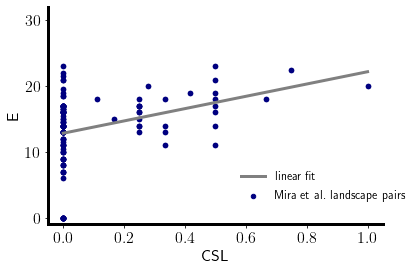

In [42]:
fig,ax= plt.subplots()
x=np.array(minCSL).flatten()
y= np.array(flipMatrix).flatten()

ax.scatter(np.array(minCSL).flatten(),np.array(flipMatrix).flatten(),
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel('E',fontsize=16)

ax.set_xlim([-.05,1.05])
ax.set_ylim([-1,32])

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')

In [43]:
len(y)

225

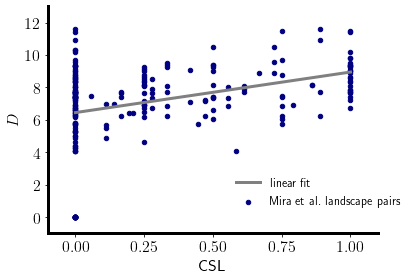

In [44]:
fig,ax= plt.subplots()
x=np.array(csl).flatten()
y= np.array(diffMatrix).flatten()

ax.scatter(np.array(csl).flatten(),np.array(diffMatrix).flatten(),
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel('$D$',fontsize=16)
ax.set_xlim([-.1,1.1])
ax.set_ylim([-1,13])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

    
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')
plt.tight_layout()
#plt.savefig('matdiffcsl.pdf')

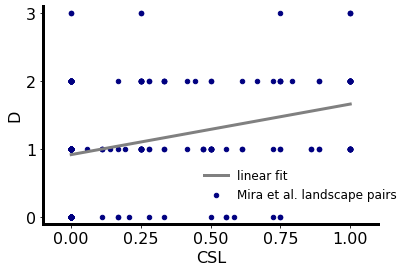

In [117]:
fig,ax= plt.subplots()
x=np.array(csl).flatten()
y= np.array(peakDist).flatten()
ax.scatter(x,y,
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel('$d(GlobalPeak_A,$',fontsize=16)
ax.set_xlim([-.1,1.1])
ax.set_ylim([-.1,3.1])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

    
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')
#plt.tight_layout()



## Spearman correlation and Edge Flips

In [46]:
spearMatrix=np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        
    
        spearMatrix[i,j] = stats.spearmanr(a1, a2)[0]



In [ ]:
def getSpearman(l1,l2):
    a1=np.array(l1.landscape)
    

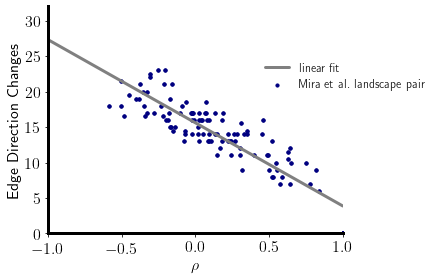

In [47]:
fig,ax=plt.subplots()
sns.set_style('white')
x= spearMatrix.flatten()
y=flipMatrix.flatten()
ax.scatter(spearMatrix,flipMatrix,s=10,color='Navy',label= 'Mira et al. landscape pair')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

ax.set_xlabel(r'$\rho$',fontsize=16)
ax.set_ylabel('Edge Direction Changes ',fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
mpl.rcParams['font.monospace']= 'Courier New'
ax.set_xlim([-1,1])
ax.set_ylim([0,32])
#ax.set_yticklabels(2 *(np.array([0,10,20,30])/32) -1)

m,b = np.polyfit(x, y, 1)

ax.plot(np.linspace(-1,1,100),m*np.linspace(-1,1,100)+b,lw= 3,linestyle="-",color='grey', label='linear fit')

ax.legend(bbox_to_anchor=(.7,.8),fontsize=12,edgecolor='w')
plt.tight_layout()
#plt.savefig('miraspearman.pdf')

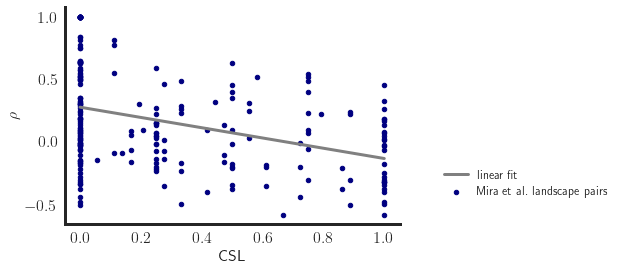

In [53]:
fig,ax= plt.subplots()
x=np.array(csl).flatten()
y= np.array(spearMatrix).flatten()

ax.scatter(np.array(csl).flatten(),np.array(spearMatrix).flatten(),
           color='navy',s=20,label= 'Mira et al. landscape pairs ')

m,b = np.polyfit(x,y,1)
ax.plot(np.linspace(0,1,100),m*np.linspace(0,1,100)+b,lw=3,color='gray',label='linear fit')

ax.set_xlabel('CSL',fontsize=16)

ax.set_ylabel(r'$\rho$',fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.set_xlim([-.1,1.1])
#ax.set_ylim([-1,32])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

    
    
ax.legend(bbox_to_anchor=(1.1,.3),fontsize=12,edgecolor='w')
#plt.tight_layout()
#plt.savefig('miraflipsCSL.pdf')

In [255]:
#NKs = [generateNKLandscape(4,2) for i in range(100)]

In [256]:
flipMatrixNK = np.zeros((len(NKs),len(NKs)))
for i,l1 in enumerate(NKs):
    for j,l2 in enumerate(NKs):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrixNK[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))

In [259]:
spearMatrixNK=np.zeros((len(NKs),len(NKs)))
for i,l1 in enumerate(NKs):
    for j,l2 in enumerate(NKs):
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        
    
        spearMatrixNK[i,j] = stats.spearmanr(a1, a2)[0]




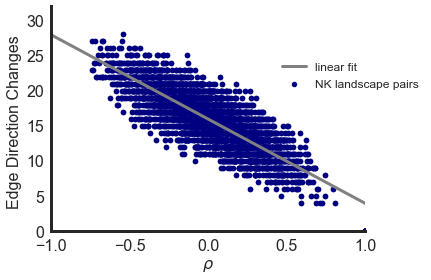

In [260]:
fig,ax=plt.subplots()

x= spearMatrixNK.flatten()
y=flipMatrixNK.flatten()
ax.scatter(spearMatrixNK,flipMatrixNK,label= 'NK landscape pairs',s=20,color='navy')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)

ax.set_xlabel(r'$\rho$',fontsize=16)
ax.set_ylabel('Edge Direction Changes ',fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

mpl.rcParams['font.monospace']= 'Courier New'

ax.set_xlim([-1,1])
ax.set_ylim([0,32])
#ax.set_yticklabels(2 *(np.array([0,10,20,30])/32) -1)

m,b = np.polyfit(x, y, 1)

ax.plot(np.linspace(-1,1,100),m*np.linspace(-1,1,100)+b,label='linear fit',color='grey',lw=3,linestyle='-')

ax.legend(bbox_to_anchor=(.7,.8),fontsize=12,edgecolor='w')
plt.tight_layout()
#plt.savefig('NKspearman.pdf')


## NK landscapes

In [54]:
NK_0 = [generateNKLandscape(4,0) for i in range(100)]
NK_1 = [generateNKLandscape(4,1) for i in range(100)]
NK_2 = [generateNKLandscape(4,2) for i in range(100)]
NK_3 = [generateNKLandscape(4,3) for i in range(100)]

In [100]:
NK_3 = [generateNKLandscape(4,3) for i in range(100)]

In [89]:
flipMatrixNK0 = np.zeros((len(NK_0),len(NK_0)))
spearMatrixNK0=np.zeros((len(NK_0),len(NK_0)))
for i,l1 in enumerate(NK_0):
    for j,l2 in enumerate(NK_0):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrixNK0[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        spearMatrixNK0[i,j] = stats.spearmanr(a1, a2)[0]
        





In [90]:
flipMatrixNK1 = np.zeros((len(NK_1),len(NK_1)))
spearMatrixNK1=np.zeros((len(NK_1),len(NK_1)))
for i,l1 in enumerate(NK_1):
    for j,l2 in enumerate(NK_1):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrixNK1[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        spearMatrixNK1[i,j] = stats.spearmanr(a1, a2)[0]

In [91]:
flipMatrixNK2 = np.zeros((len(NK_2),len(NK_2)))
spearMatrixNK2=np.zeros((len(NK_1),len(NK_1)))
for i,l1 in enumerate(NK_2):
    for j,l2 in enumerate(NK_2):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrixNK2[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        spearMatrixNK2[i,j] = stats.spearmanr(a1, a2)[0]

In [101]:
flipMatrixNK3 = np.zeros((len(NK_3),len(NK_3)))
spearMatrixNK3=np.zeros((len(NK_1),len(NK_1)))
for i,l1 in enumerate(NK_3):
    for j,l2 in enumerate(NK_3):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrixNK3[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        spearMatrixNK3[i,j] = stats.spearmanr(a1, a2)[0]
        

In [102]:
limNK_0 =[limitMatrix(buildTransitionMatrix(NK)) for NK in NK_0]
limNK_1 =[limitMatrix(buildTransitionMatrix(NK)) for NK in NK_1]
limNK_2 =[limitMatrix(buildTransitionMatrix(NK)) for NK in NK_2]
limNK_3 =[limitMatrix(buildTransitionMatrix(NK)) for NK in NK_2]


def prob_betterNK(d1,d2,init_pop,N,NKs,limNK):
    limit_d1 = limNK[d1]
    pop_dist = np.ones(2**N)/ 2**N * limit_d1
    pop_dist = np.array(pop_dist)[0]

    prob = 0
    wt_f = NKs[d2].getFitness(np.zeros(6).astype(int).tolist())
    for i in range(len(pop_dist)):
        if NKs[d2].getFitness(convertIntToGenotype(i,N)) < wt_f:
            prob+=pop_dist[i]

    return prob
cslNK_0 = [[prob_betterNK(d1,d2,init_pop,4,NK_0,limNK_0) for d1 in range(len(NK_0))] \
           for d2 in range(len(NK_0))]
cslNK_1 = [[prob_betterNK(d1,d2,init_pop,4,NK_1,limNK_1) for d1 in range(len(NK_0))] \
           for d2 in range(len(NK_0))]
cslNK_2 = [[prob_betterNK(d1,d2,init_pop,4,NK_2,limNK_2) for d1 in range(len(NK_0))] \
           for d2 in range(len(NK_0))]
cslNK_3 = [[prob_betterNK(d1,d2,init_pop,4,NK_3,limNK_3) for d1 in range(len(NK_0))] \
           for d2 in range(len(NK_0))]

In [81]:
len(cslNK_3)

100

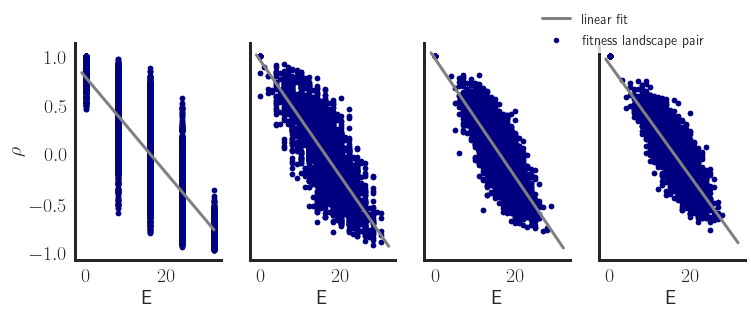

In [103]:
fig,axs=plt.subplots(1,4,figsize=(12,4),sharey=True)
xs = [flipMatrixNK0.flatten(),flipMatrixNK1.flatten(),flipMatrixNK2.flatten(),flipMatrixNK3.flatten()]
ys= [spearMatrixNK0.flatten(),spearMatrixNK1.flatten(),spearMatrixNK2.flatten(),spearMatrixNK3.flatten()]

for x,y,ax in zip(xs,ys,axs.flatten()):
    ax.scatter(x,y,s=20,color='navy',label='fitness landscape pair')
    m,b = np.polyfit(x, y, 1)

    ax.plot(np.linspace(-1,32,100),m*np.linspace(-1,32,100)+b,label='linear fit',color='grey',lw=3,linestyle='-')
    #ax.set_ylim([-1,28])
    #ax.set_xlim([-.05,1.05])
    #ax.set_ylabel('$E$',fontsize=20 )
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlabel('E',fontsize=20 )
    

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
    
    for axis in ['top','right']:
        ax.spines[axis].set_visible(False)
axs[0].set_ylabel(r'$\rho$',fontsize=20 )
#axs.flatten()[0].set_ylim([-1,26])
#axs.flatten()[1].set_ylim([-1,26])
#axs.flatten()[2].set_ylim([-1,33])
#axs.flatten()[3].set_ylim([-1,33])
#axs.flatten()[0].set_xticklabels([])
#axs.flatten()[1].set_xticklabels([])
#axs.flatten()[3].set_xticks([-1,0,1])
#axs.flatten()[2].set_xlim([-.05,1.05])
#axs.flatten()[0].set_xlim([-.05,1.05])
#axs.flatten()[2].set_xlabel('Collateral Sensitivity Likelihood ',fontsize=20 )
#axs.flatten()[3].set_xlabel(r'$\rho$',fontsize=20 )

#axs[1,1].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
axs[3].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
#plt.savefig('scatterplots.pdf')

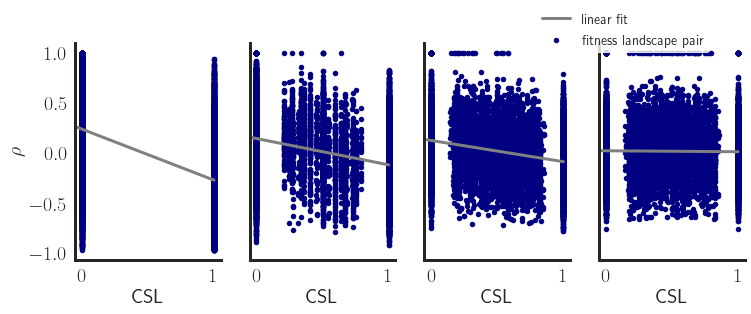

In [106]:
fig,axs=plt.subplots(1,4,figsize=(12,4),sharey=True)
xs = [np.array(cslNK_0).flatten(),np.array(cslNK_1).flatten(),np.array(cslNK_2).flatten(),np.array(cslNK_3).flatten()]
ys= [spearMatrixNK0.flatten(),spearMatrixNK1.flatten(),spearMatrixNK2.flatten(),spearMatrixNK3.flatten()]

for x,y,ax in zip(xs,ys,axs.flatten()):
    ax.scatter(x,y,s=20,color='navy',label='fitness landscape pair')
    m,b = np.polyfit(x, y, 1)

    ax.plot(np.linspace(-1,1,100),m*np.linspace(-1,1,100)+b,label='linear fit',color='grey',lw=3,linestyle='-')
    #ax.set_ylim([-1,28])
    ax.set_xlim([-.05,1.05])
    #ax.set_ylabel('$E$',fontsize=20 )
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlabel('CSL ',fontsize=20 )
    

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
    
    for axis in ['top','right']:
        ax.spines[axis].set_visible(False)
axs[0].set_ylabel(r'$\rho$',fontsize=20 )
#axs.flatten()[0].set_ylim([-1,26])
#axs.flatten()[1].set_ylim([-1,26])
#axs.flatten()[2].set_ylim([-1,33])
#axs.flatten()[3].set_ylim([-1,33])
#axs.flatten()[0].set_xticklabels([])
#axs.flatten()[1].set_xticklabels([])
#axs.flatten()[3].set_xticks([-1,0,1])
#axs.flatten()[2].set_xlim([-.05,1.05])
#axs.flatten()[0].set_xlim([-.05,1.05])
#axs.flatten()[2].set_xlabel('Collateral Sensitivity Likelihood ',fontsize=20 )
#axs.flatten()[3].set_xlabel(r'$\rho$',fontsize=20 )

#axs[1,1].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
axs[3].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
#plt.savefig('scatterplots.pdf')

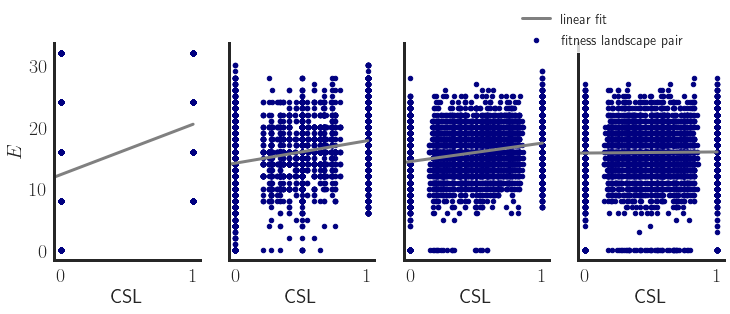

In [107]:
fig,axs=plt.subplots(1,4,figsize=(12,4),sharey=True)
xs = [np.array(cslNK_0).flatten(),np.array(cslNK_1).flatten(),np.array(cslNK_2).flatten(),np.array(cslNK_3).flatten()]
ys= [flipMatrixNK0.flatten(),flipMatrixNK1.flatten(),flipMatrixNK2.flatten(),flipMatrixNK3.flatten()]

for x,y,ax in zip(xs,ys,axs.flatten()):
    ax.scatter(x,y,s=20,color='navy',label='fitness landscape pair')
    m,b = np.polyfit(x, y, 1)

    ax.plot(np.linspace(-1,1,100),m*np.linspace(-1,1,100)+b,label='linear fit',color='grey',lw=3,linestyle='-')
    #ax.set_ylim([-1,28])
    ax.set_xlim([-.05,1.05])
    #ax.set_ylabel('$E$',fontsize=20 )
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlabel('CSL ',fontsize=20 )
    

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
    
    for axis in ['top','right']:
        ax.spines[axis].set_visible(False)
axs[0].set_ylabel('$E$',fontsize=20 )
#axs.flatten()[0].set_ylim([-1,26])
#axs.flatten()[1].set_ylim([-1,26])
#axs.flatten()[2].set_ylim([-1,33])
#axs.flatten()[3].set_ylim([-1,33])
#axs.flatten()[0].set_xticklabels([])
#axs.flatten()[1].set_xticklabels([])
#axs.flatten()[3].set_xticks([-1,0,1])
#axs.flatten()[2].set_xlim([-.05,1.05])
#axs.flatten()[0].set_xlim([-.05,1.05])
#axs.flatten()[2].set_xlabel('Collateral Sensitivity Likelihood ',fontsize=20 )
#axs.flatten()[3].set_xlabel(r'$\rho$',fontsize=20 )

#axs[1,1].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
axs[3].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
#plt.savefig('scatterplots.pdf')

In [114]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [122]:
polyfit(flipMatrixNK0.flatten(),spearMatrixNK0.flatten(), 1)

{'polynomial': [-0.04890993320762076, 0.7824677412326065],
 'determination': 0.6192918470931887}

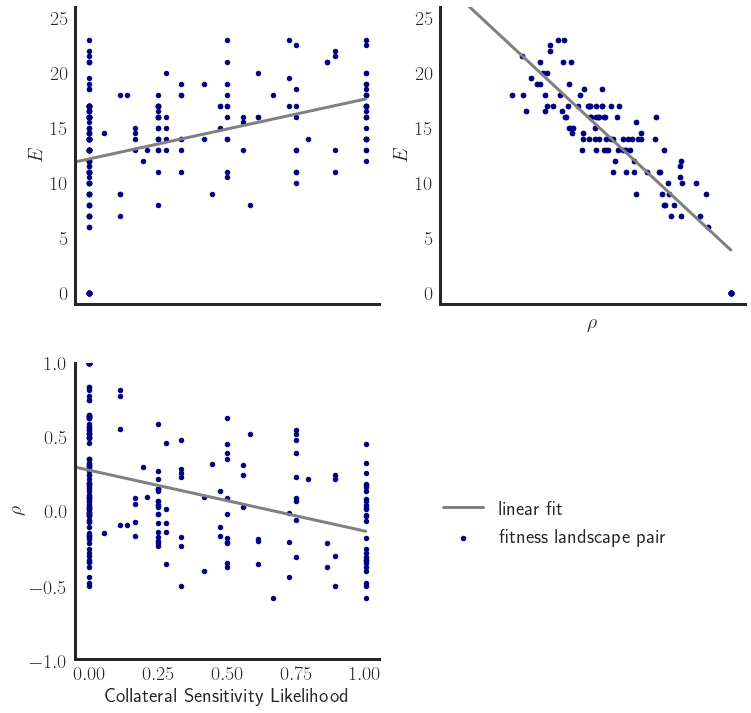

In [140]:
fig,axs=plt.subplots(2,2,figsize=(12,12))
xs = [np.array(csl).flatten(),spearMatrix.flatten(),np.array(csl).flatten()]
ys= [flipMatrix.flatten(),flipMatrix.flatten(),spearMatrix.flatten()]

for x,y,ax in zip(xs,ys,axs.flatten()[:3]):
    ax.scatter(x,y,s=20,color='navy',label='fitness landscape pair')
    m,b = np.polyfit(x, y, 1)

    ax.plot(np.linspace(-1,1,100),m*np.linspace(-1,1,100)+b,label='linear fit',color='grey',lw=3,linestyle='-')
    #ax.set_ylim([-1,28])
    ax.set_ylabel('$E$',fontsize=20 )
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
    
    for axis in ['top','right']:
        ax.spines[axis].set_visible(False)
        
axs[0,1].set_xlabel(r'$\rho$',fontsize=20 )
axs[1,0].set_ylabel(r'$\rho$',fontsize=20 )
axs.flatten()[0].set_ylim([-1,26])
axs.flatten()[1].set_ylim([-1,26])
axs.flatten()[2].set_ylim([-1,1])
axs.flatten()[3].set_ylim([-1,33])
axs.flatten()[0].set_xticklabels([])
axs.flatten()[1].set_xticklabels([])
axs.flatten()[3].set_xticks([-1,0,1])
axs.flatten()[2].set_xlim([-.05,1.05])
axs.flatten()[0].set_xlim([-.05,1.05])
axs.flatten()[3].axis('off')
axs.flatten()[2].set_xlabel('Collateral Sensitivity Likelihood ',fontsize=20 )
axs.flatten()[3].set_xlabel(r'$\rho$',fontsize=20 )

#axs[1,1].legend(bbox_to_anchor=(.8,1.2),edgecolor='w',fontsize=14)
axs[1,0].legend(bbox_to_anchor=(2,.6),edgecolor='w',fontsize=20)
#plt.savefig('scatterplots.pdf')

## Difference in Epistatic coefficient

In [346]:
peakEdgeg=  np.zeros((len(landscapes),len(landscapes)))
peakEdge=  np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        Dmat = np.abs(edgeFlips(p1,p2)/2)
        for peak in l1.getPeaks():
            k1=convertGenotypeToInt(peak)
        peakEdgeg[j,i]=np.sum(Dmat,axis=1)[convertGenotypeToInt(l1.getGlobalPeak())]
        peakEdge[j,i]+=np.sum(Dmat,axis=1)[k1]
        

In [349]:
peakEdge

array([[0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 2., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 2., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 2., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 2., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 3., 0.],
       [0., 1., 1., 0., 2., 0., 0., 1., 1., 1., 0., 1., 0., 3., 0.],
       [0., 1., 1., 0., 2., 1., 0., 1., 1., 1., 0., 1., 0., 2., 0.],
       [0., 0., 1., 0., 2., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0.],
       [0., 1., 1., 0., 2., 1., 0., 1., 2., 1., 0., 2., 0., 3., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 2., 1., 0., 1., 1., 1., 0., 1., 0., 2., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 2., 1., 0.

In [326]:
Dmat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [142]:
flipMatrix = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        Dmat = np.abs(edgeFlips(p1,p2)/2)
        np.sum(Dmat,axis=1)[]
        
        #flipMatrix[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.-0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j,  1.+0.j, -1.-0.j, -1.-0.j],
       [ 1.+0.j, -1.-0.j, -1.-0.j,  1.+0.j]])

In [309]:
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        fw1=np.dot(hadamard(16, dtype=complex),np.array(l1.landscape))/16
        fw2 =np.dot(hadamard(16, dtype=complex),np.array(l2.landscape))/16
        Dmat = np.abs(edgeFlips(p1,p2)/2)
        epiSign1= np.sum(np.abs(np.ceil(np.dot(Dmat,fw1).astype(float))-np.ceil(np.dot(Dmat,fw2).astype(float))))
        epiSign2 =np.sum(np.abs(np.ceil(np.dot(Dmat.T,fw1).astype(float))-np.ceil(np.dot(Dmat.T,fw2).astype(float))))
        epiMatrix[i,j] = epiSign1+epiSign2
        #epiMatrix[i,j]= np.sum(np.abs(np.dot(Dmat,fw1)-np.dot(Dmat,fw2))+np.abs(np.dot(Dmat.T,fw1)-np.dot(Dmat.T,fw2)))

<ipython-input-309-ec35bbb1319a>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  epiSign1= np.sum(np.abs(np.ceil(np.dot(Dmat,fw1).astype(float))-np.ceil(np.dot(Dmat,fw2).astype(float))))
<ipython-input-309-ec35bbb1319a>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  epiSign2 =np.sum(np.abs(np.ceil(np.dot(Dmat.T,fw1).astype(float))-np.ceil(np.dot(Dmat.T,fw2).astype(float))))


In [332]:

l1=landscapes[2]
l2=landscapes[9]
k1=convertGenotypeToInt(l1.getGlobalPeak())
fw1=np.dot(hadamard(16, dtype=complex),np.array(l1.landscape))/16
fw2 =np.dot(hadamard(16, dtype=complex),np.array(l2.landscape))/16
p1=buildTransitionMatrix(l1)
p2 = buildTransitionMatrix(l2)
Dmat = np.abs(edgeFlips(p1,p2)/2)
np.sum(Dmat,axis=1)[k1]

2.0

In [329]:
np.abs(edgeFlips(p1,p2)/2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [330]:
k1

7

In [308]:
np.sum(np.abs(np.ceil(np.dot(Dmat,fw1).astype(float))-np.ceil(np.dot(Dmat,fw2).astype(float))))

<ipython-input-308-128026105935>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  np.sum(np.abs(np.ceil(np.dot(Dmat,fw1).astype(float))-np.ceil(np.dot(Dmat,fw2).astype(float))))


2.0

In [304]:
np.dot(Dmat,fw1)

array([ 0.2635625+0.j,  0.0970625+0.j, -0.1719375+0.j,  0.       +0.j,
        0.038625 +0.j, -0.3218125+0.j,  0.       +0.j,  0.       +0.j,
        0.0970625+0.j, -0.3655625+0.j, -0.1020625+0.j,  0.       +0.j,
       -0.467625 +0.j,  0.1965625+0.j,  0.1965625+0.j,  0.       +0.j])

In [298]:
np.dot(Dmat,fw1) - np.dot(Dmat,fw2)

array([ 0.2476875+0.j,  0.0254375+0.j, -0.3828125+0.j,  0.       +0.j,
       -0.345375 +0.j, -0.4966875+0.j,  0.       +0.j,  0.       +0.j,
        0.0254375+0.j, -0.2276875+0.j, -0.0914375+0.j,  0.       +0.j,
       -0.319125 +0.j,  0.0045625+0.j,  0.0045625+0.j,  0.       +0.j])

In [292]:
np.sum(np.abs(np.dot(Dmat,fw1))+np.abs(np.dot(Dmat,fw2)))

3.9283124999999997

In [314]:
peakDist = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        k1=l1.getGlobalPeak()
        k2=l2.getGlobalPeak()
        y1=l1.getLowestFitnessPeak()
        y2=l2.getLowestFitnessPeak()
        

        peakDist[i,j] = hammingDistance(k1,y2)
        peakDist[j,i] = hammingDistance(k2,y1)

In [256]:
epiMatrix=np.zeros((len(landscapes),len(landscapes)))

for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        fw1=np.dot(hadamard(16, dtype=complex),np.array(l1.landscape))/16
        fw2 =np.dot(hadamard(16, dtype=complex),np.array(l2.landscape))/16
        
        epiMatrix[i,j]=np.max(fw1)-np.max(fw2)
        #epiMatrix[i,j]=np.sum(np.abs(hadamard(16, dtype=complex)*np.array(l1.landscape) / 16) +np.abs(hadamard(16, dtype=complex)*np.array(l2.landscape) / 16))

<ipython-input-256-992afd1976b3>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  epiMatrix[i,j]=np.max(fw1)-np.max(fw2)


In [280]:
np.dot(hadamard(16, dtype=complex),np.array(MIRA_TZP.landscape))/16

array([ 1.7885625+0.j,  0.2883125+0.j,  1.0030625+0.j, -0.3601875+0.j,
       -0.0851875+0.j,  0.0050625+0.j, -0.0079375+0.j,  0.0623125+0.j,
        0.3578125+0.j,  0.2333125+0.j, -0.1664375+0.j, -0.2859375+0.j,
       -0.0229375+0.j, -0.0119375+0.j, -0.0744375+0.j, -0.0444375+0.j])

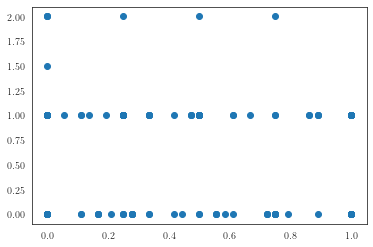

In [347]:
x=np.array(peakEdgeg).flatten()
y=np.array(csl).flatten()
plt.scatter(y,x)

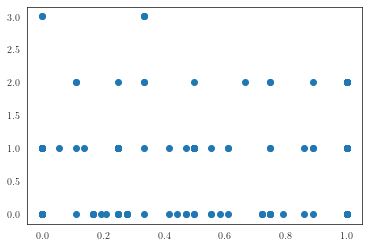

In [348]:
x=np.array(peakEdge).flatten()
y=np.array(csl).flatten()
plt.scatter(y,x)

## edgeflips over seascape 

In [152]:

for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        
        
        np.sum(np.abs(hadamard(16, dtype=complex)*np.array(MIRA_AMP.landscape) / 16) +np.abs(hadamard(16, dtype=complex)*np.array(MIRA_AM.landscape) / 16))

52.634

In [748]:
##Adapted from Irem et al, 2020
# This script reproduces the drug response curves in Ogbunugafor et. al, 2016
# to confirm that wer're doing everything right.

# Note that the equation expects log10 of drug concentration and IC 50
# Also note that we're working with molar concentrations while Ogbunugafor et. al
# used micromolar

# This is the value of c used by Ogbunugafor et. al, 2016 (obtained via personal communication)
c = -.6824968
# IC50 values are from supplemental table 1 of Ogbunugafor et. al, 2016/supplemental 
# data table 3 of Brown et al, 2010 (https://academic.oup.com/mbe/article/27/12/2682/1072079)
# (the same data are in both tables). They are log10.
logic50s = [-6.286,-5.812,-4.239,1,-6.046,-5.774,-3.732,-3.55,-5.724,-5.491,-4.015,-4.6,-5.773,-5.624,-3.587,-3.3]
# These are the untransformed drugless growth values from supplemental 
# data table 3 of Brown et al, 2010. Normalized versions of these values were used
# by Ogbunugafor et. al, 2016 
g_druglesses = [0.000969794, 0.000884475, 0.000851618, 0, 0.000950368, 0.000953728, 0.000969172, 0.000845918, 0.000776222, 0.000821543, 0.000906315, 0.000693783, 0.000883164, 0.000889632, 0.001005913, 0.000867504]


xs = []
ys = []
for _ in g_druglesses:
    ys.append([])

for i in np.logspace(-9, 5, num=100000):
    xs.append(i)
    for genotype in range(len(logic50s)):
        ys[genotype].append((g_druglesses[genotype]/(1+np.exp((logic50s[genotype] - np.log10(i))/c)))/0.000693783)
   


In [749]:
arr = np.abs(np.diff(np.argsort(ys,axis=0)))

arr[arr!=0] = 1

In [809]:
flip_inds =np.argwhere(np.sum(np.abs(np.diff(np.argsort(np.array(ys),axis=0))),axis=0)!=0)
pairs = []
non_pairs =[]
flips = np.zeros(len(xs))
pair_inds=[]
for i,ind in enumerate(flip_inds):
    ind=ind[0]

    l1= FitnessLandscape(np.array(ys)[:,ind])
    l2 = FitnessLandscape(np.array(ys)[:,ind+1])

    p1=buildTransitionMatrix(l1)
    p2=buildTransitionMatrix(l2)

    
    flips[ind] = np.sum(np.abs(edgeFlips(p1,p2))/2)
    non_pairs.append(np.argwhere(arr[:,ind]!=0).flatten())
    if np.sum(np.abs(edgeFlips(p1,p2))/2)!=0:
        pairs.append(np.argwhere(edgeFlips(p1,p2)!=0))
        pair_inds.append(i)




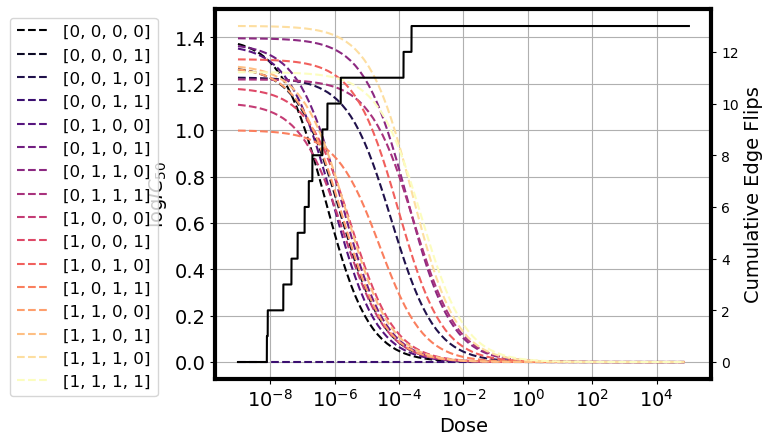

In [724]:
fig,ax=plt.subplots() 
ax2= ax.twinx()
for genotype in range(len(logic50s)):
    ax.semilogx(xs[::1000], ys[genotype][::1000],color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--")

    
ax.grid()

ax.legend(fontsize=12,bbox_to_anchor=(-.1,1))


#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='gray')
ax2.semilogx(xs,np.cumsum(flips),color='k')
for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Cumulative Edge Flips',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'

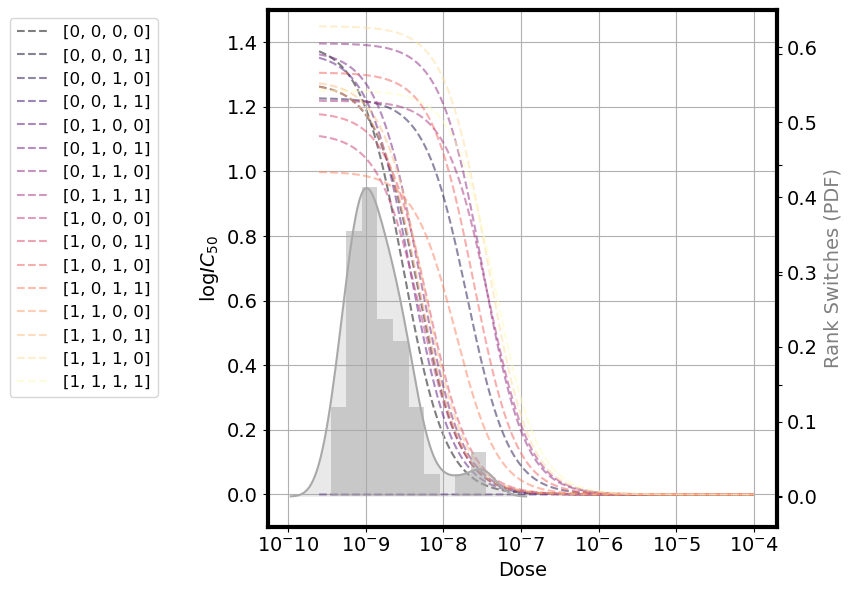

In [694]:
fig,ax=plt.subplots(figsize=(9,6)) 

#hist, bins, _ =plt.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten().astype(int)],
#                        bins=10,color='w',alpha=0);
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#ax2.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()], bins=logbins,color='darkgrey',zorder=-1)
for genotype in range(len(logic50s)):
    ax.plot(np.log10(xs), ys[genotype],color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--",zorder=genotype,alpha=.5)
    #ax.legend(fontsize=12,bbox_to_anchor=(-.1,1))
    
    
    
#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='grey',label='Cum.')
ax3= ax.twinx()
ax3.hist(np.log10(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()]), bins=10,color='darkgrey',zorder=-1,alpha=.5)
ax2= ax.twinx()
sns.kdeplot(np.log10(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()]), shade=True, ax=ax2,color='darkgrey')


ax.grid()
ax3.set_ylim([-1.4,22])
ax2.set_ylim([-.04,.65])
ax.set_ylim([-.1,1.5])
ax3.set_yticklabels([])
#ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))
ax.legend(fontsize=12,bbox_to_anchor=(-.2,1))
for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Rank Switches (PDF)',fontsize=14,color='grey')
ax.set(xticklabels=["$10^" + i.get_text() + "$" for i in labels])
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

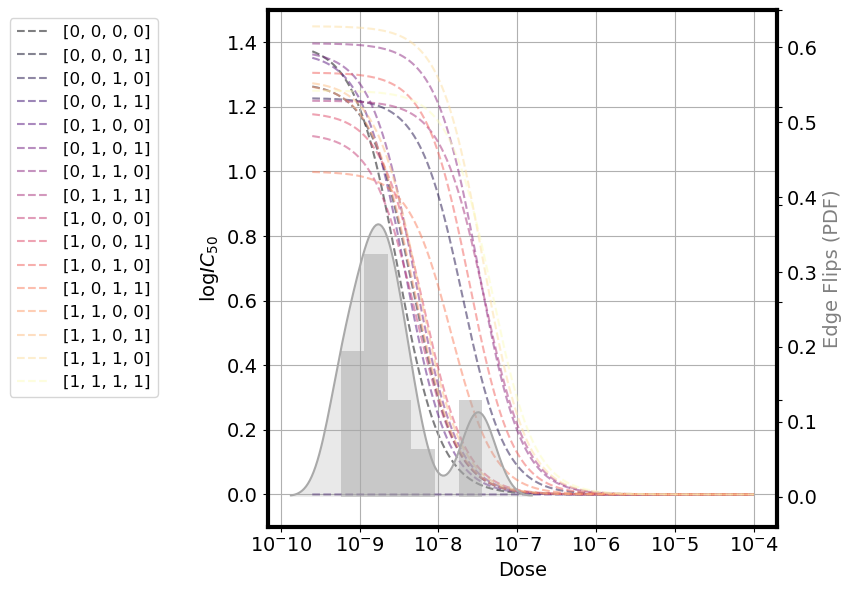

In [695]:
fig,ax=plt.subplots(figsize=(9,6)) 

#hist, bins, _ =plt.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten().astype(int)],
#                        bins=10,color='w',alpha=0);
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#ax2.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()], bins=logbins,color='darkgrey',zorder=-1)
for genotype in range(len(logic50s)):
    ax.plot(np.log10(xs), ys[genotype],color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--",zorder=genotype,alpha=.5)
    #ax.legend(fontsize=12,bbox_to_anchor=(-.1,1))
    
    
    
#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='grey',label='Cum.')
ax3= ax.twinx()
ax3.hist(np.log10(np.array(xs)[np.argwhere(flips).flatten()]), bins=6,color='darkgrey',zorder=-1,alpha=.5)
ax2= ax.twinx()
sns.kdeplot(np.log10(np.array(xs)[np.argwhere(flips).flatten()]), shade=True, ax=ax2,color='darkgrey')


ax.grid()
ax3.set_ylim([-.6,10])
ax2.set_ylim([-.04,.65])
ax.set_ylim([-.1,1.5])
ax3.set_yticklabels([])
#ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))
ax.legend(fontsize=12,bbox_to_anchor=(-.2,1))
for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Edge Flips (PDF)',fontsize=14,color='grey')
ax.set(xticklabels=["$10^" + i.get_text() + "$" for i in labels])
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

In [228]:
pos = {(0,0,0,0,): [.4,1],
       (1,0,0,0): [.15,.75],(0,1,0,0): [.35,.75],(0,0,1,0): [.55,.75],(0,0,0,1): [.75,.75],
      (1,1,0,0):[.05,.5],(1,0,1,0):[.2,.5],(1,0,0,1):[.35,.5],(0,1,1,0):[.5,.5],(0,1,0,1):[.65,.5],(0,0,1,1):[.8,.5],
      (1,1,1,0):[.15,.25],(1,1,0,1):[.35,.25],(1,0,1,1):[.55,.25],(0,1,1,1):[.75,.25],
      (1,1,1,1):[.4,0]}

#positiong nodes manually - have tfound no automatic way to tihis well -all of the networkx energy minization tools fail to :"square" up the node the viewrs plane

array([13, 15])

(0.012499999999999997, 0.8375, -0.05, 1.05)

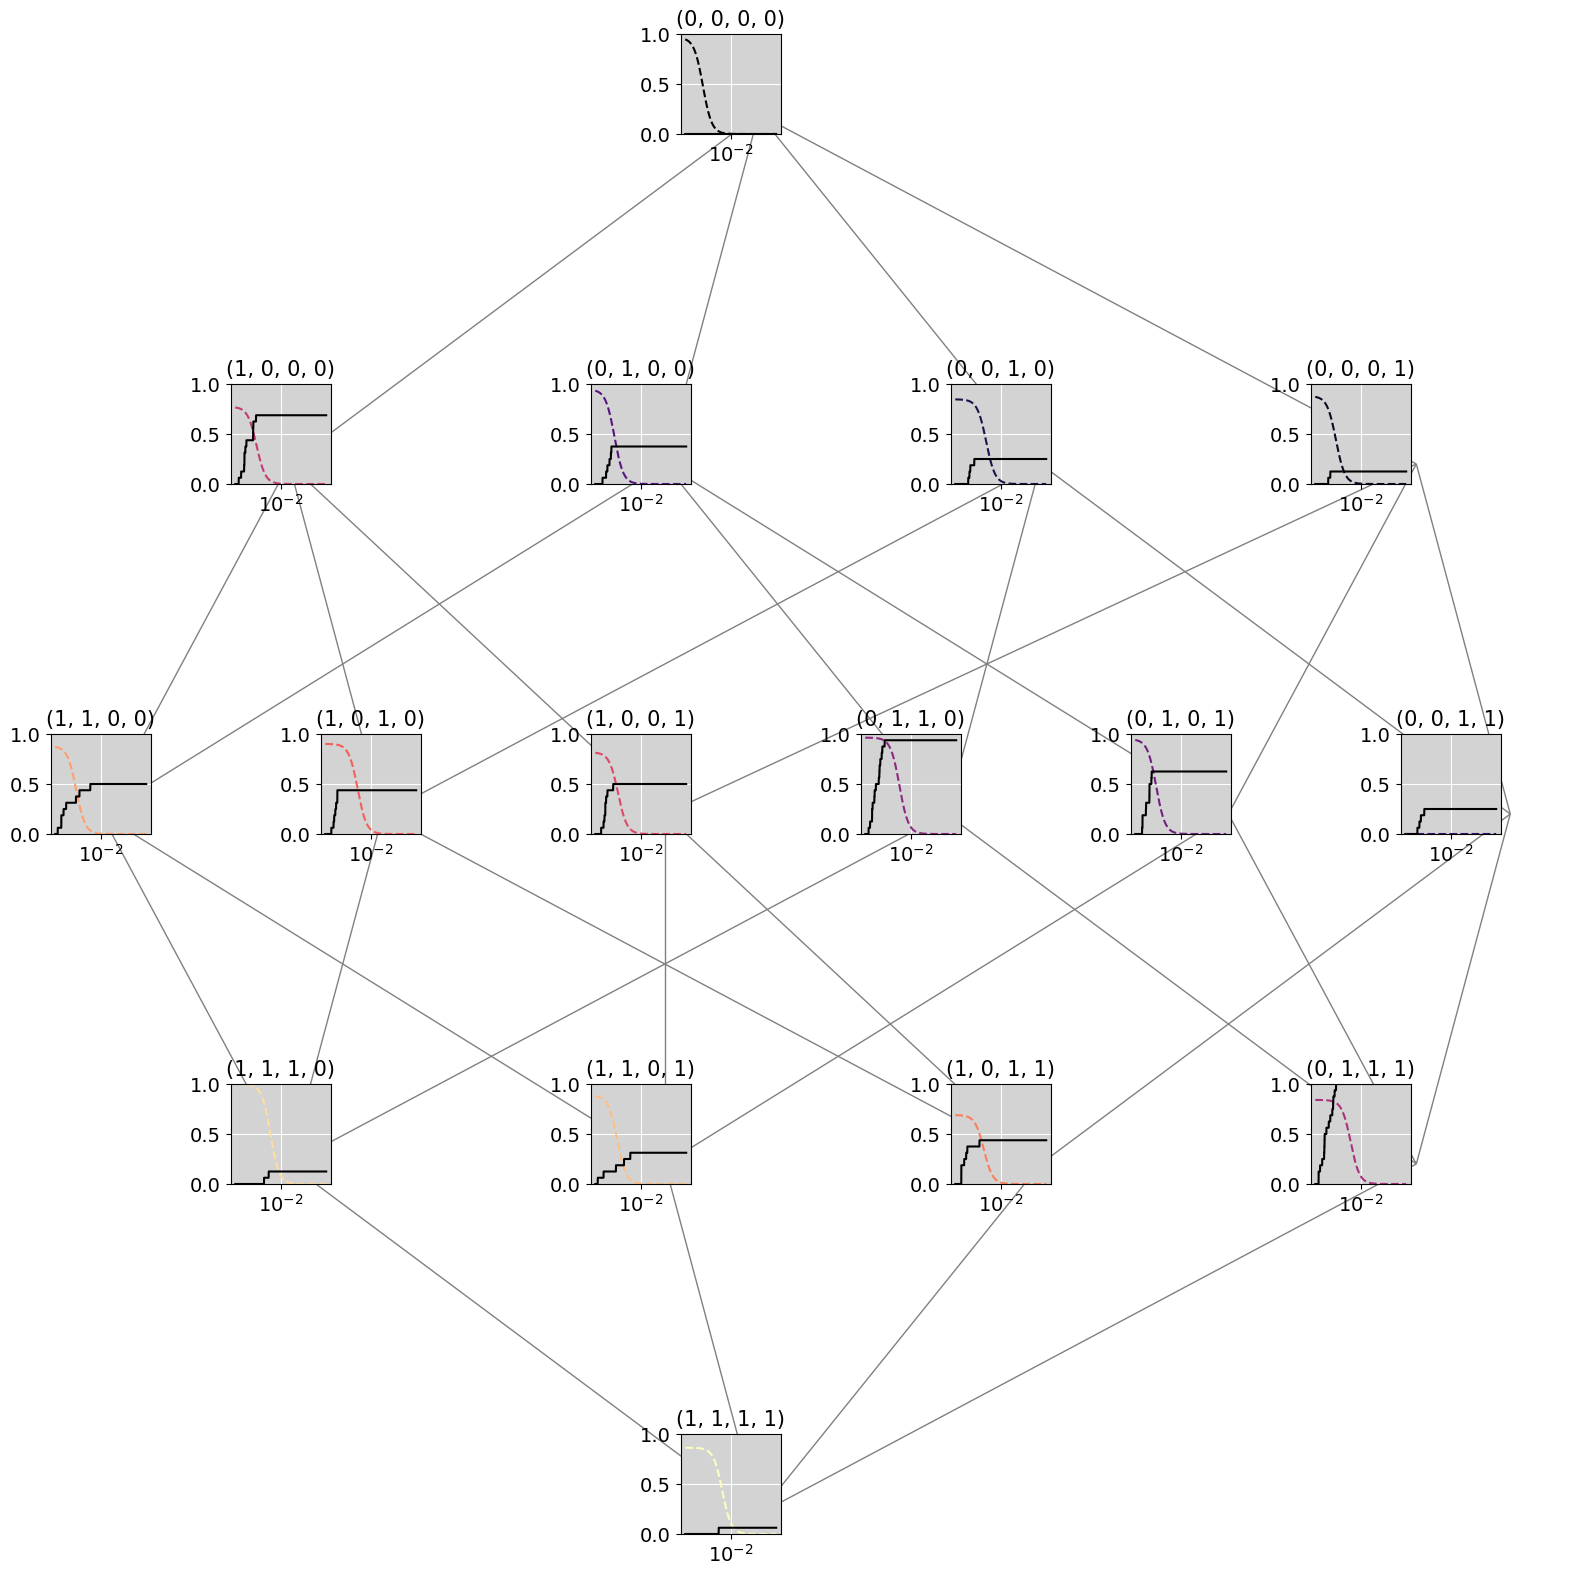

In [235]:
fig,ax=plt.subplots(figsize=(20,20))
G = nx.hypercube_graph(4) #establishing 5 cube
for node in G:
    genotype = convertGenotypeToInt(node)
    plt.axes([pos[node][0]+(.9-pos[node][0])*.1,pos[node][1] +(.45-pos[node][1])*.3 , .05, .05], 
             facecolor='lightgray')
    plt.semilogx(xs, ys[genotype]/np.max(ys),color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--")
    plt.semilogx(xs[1:],np.cumsum(arr[genotype])/16,color='k')
    #graph logMIC vs termature at each node
    plt.ylim([0,1])
    plt.title(str(node),fontsize=15)
    plt.grid(color='w')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #label representative node axes
   # if node == (0,0,0,0,0):
        #plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
       # plt.ylabel('$\log_2 MIC$',fontsize=15)

    #label representative node axes
   # ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='gray')#ghis will draw the edge betweeen nodes,
#looks okay without too, but will need to adjust axis spines if this case


ax.axis('off')

In [711]:
a4 = np.array([[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])
a1 = np.array([[0,8],[1,9],[2,10],[3,11],[4,12],[5,13],[6,14],[7,15]])
a2= np.array([[0,4],[1,5],[2,6],[3,7],[4,8],[5,9],[6,10],[7,8]])
a3 = np.array([[0,2],[1,3],[2,4],[3,5],[4,6],[5,7],[6,8],[7,9]])


inds = np.argsort(np.argwhere(arr==1),axis=0)[:,1]

ordp = np.argwhere(arr==1)[inds,0]
ordp = ordp.reshape(int(len(ordp)/2),2)


alleles = np.zeros((4,len(xs)))
for i,pair in enumerate(ordp):
    pair=np.sort(pair)
    all_ind = -1
    for a in a1:
        if np.all(pair==a):
            all_ind =0
            print(0)
            
    for a in a2:
        if np.all(pair==a):
            all_ind =1
            print(0)
            
    for a in a3:
        if np.all(pair==a):
            all_ind =2
            print(0)
            
    for a in a4:
        if np.all(pair==a):
            all_ind =3
            print(0)
            
    alleles[all_ind,np.argwhere(arr==1)[inds,1].reshape(53,2)[i,0]] =1
            
    
            
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


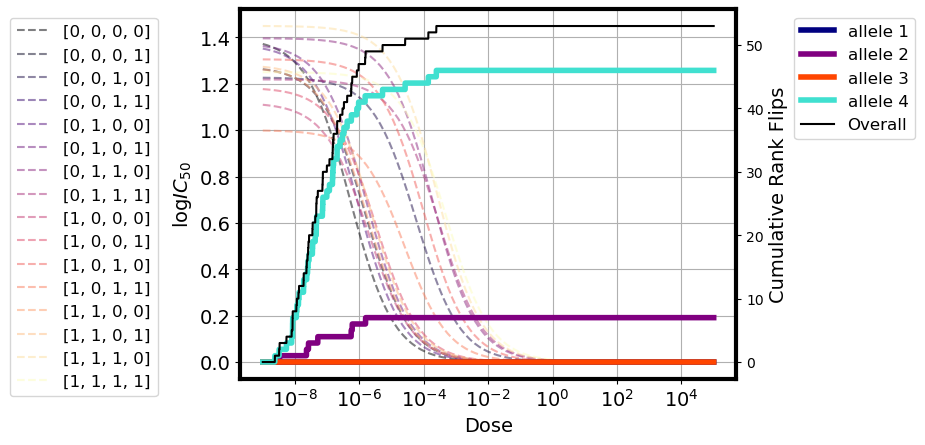

In [712]:
fig,ax=plt.subplots() 
ax2= ax.twinx()
for genotype in range(len(logic50s)):
    ax.semilogx(xs[::1000], ys[genotype][::1000],color=colors[genotype],
                label=convertIntToGenotype(genotype,4),linestyle="--",alpha=.5)

colors_allele = ['navy','purple','orangered','turquoise']
for i in range(4):
    ax2.semilogx(xs,np.cumsum(alleles[i,:]),label = 'allele ' +str(i+1),lw=4,color=colors_allele[i])
    
    
ax2.semilogx(xs,np.cumsum(np.sum(alleles,axis=0),axis=0),color='k',label = 'Overall')
ax.grid()

ax.legend(fontsize=12,bbox_to_anchor=(-.15,1))
ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))


#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='k')

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Cumulative Rank Flips',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'

In [704]:
a4 = np.array([[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])
a1 = np.array([[0,8],[1,9],[2,10],[3,11],[4,12],[5,13],[6,14],[7,15]])
a2= np.array([[0,4],[1,5],[2,6],[3,7],[4,8],[5,9],[6,10],[7,8]])
a3 = np.array([[0,2],[1,3],[2,4],[3,5],[4,6],[5,7],[6,8],[7,9]])


inds = np.argsort(np.argwhere(arr==1),axis=0)[:,1]

ordp = np.argwhere(arr==1)[inds,0]
ordp = ordp.reshape(int(len(ordp)/2),2)


alleles = np.zeros((4,len(xs)))
for i,pair in enumerate(np.array(pairs)):
    pair=np.sort(pair[0])
    all_ind = -1
    for a in a1:
        if np.all(pair==a):
            all_ind =0
            print(0)
            
    for a in a2:
        if np.all(pair==a):
            all_ind =1
            print(0)
            
    for a in a3:
        if np.all(pair==a):
            all_ind =2
            print(0)
            
    for a in a4:
        if np.all(pair==a):
            all_ind =3
            print(0)
            
    alleles[all_ind,np.argwhere(arr==1)[inds,1].reshape(53,2)[i,0]] =1
            
    
            
    

0
0
0
0
0
0
0
0
0
0


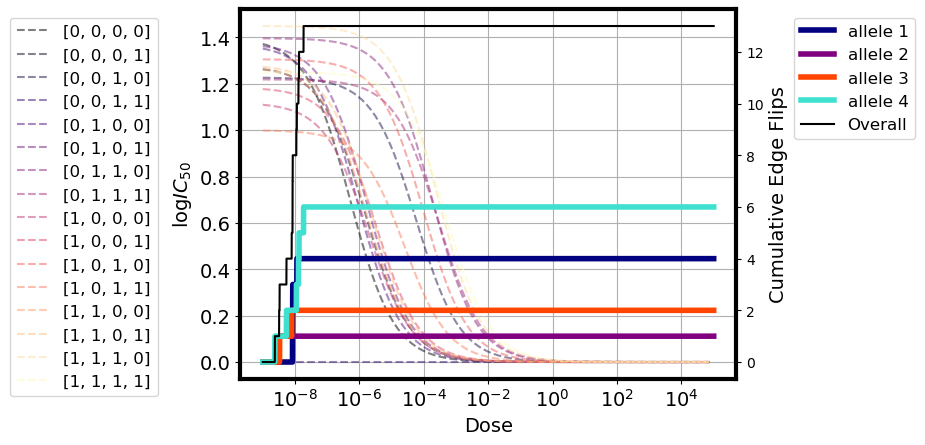

In [706]:
fig,ax=plt.subplots() 
ax2= ax.twinx()
for genotype in range(len(logic50s)):
    ax.semilogx(xs[::1000], ys[genotype][::1000],color=colors[genotype],
                label=convertIntToGenotype(genotype,4),linestyle="--",alpha=.5)

colors_allele = ['navy','purple','orangered','turquoise']
for i in range(4):
    ax2.semilogx(xs,np.cumsum(alleles[i,:]),label = 'allele ' +str(i+1),lw=4,color=colors_allele[i])
    
    
ax2.semilogx(xs,np.cumsum(np.sum(alleles,axis=0),axis=0),color='k',label = 'Overall')
ax.grid()

ax.legend(fontsize=12,bbox_to_anchor=(-.15,1))
ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))


#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='k')

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Cumulative Edge Flips',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'